# Импорты

In [1]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Загрузка и анализ данных

In [114]:
lego_base=pd.read_csv('dataset/prices_data.csv')
lego_base.drop(columns=['Store','Discount'], inplace=True)
lego_base.head()

,Set,Name,Theme,Year,Parts,Cost
0,77901-1,Sith Trooper Bust,Star Wars,2019,484,"CFA6,471List: CFA6,989Avg: CFA283,291"
1,4002019-1,Yuletide Squadron Xmas-Wing Starfighter,LEGO Exclusive,2019,1038,"CFA6,471List: CFA6,989Avg: CFA250,792"
2,77903-1,The Dark Knight of Gotham City,Super Heroes DC,2019,427,"CFA9,271Avg: CFA260,959"
3,4000034-1,The LEGO System House,LEGO Exclusive,2019,998,"CFA64,791List: CFA70,150Avg: CFA1,494,822"
4,4002017-1,Nutcracker,LEGO Exclusive,2017,729,"CFA10,788Avg: CFA148,645"


In [12]:
lego_base.shape

(10004, 6)

In [13]:
lego_base.columns

Index(['Set', 'Name', 'Theme', 'Year', 'Parts', 'Cost'], dtype='object')

In [14]:
lego_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Set     10004 non-null  object
 1   Name    10004 non-null  object
 2   Theme   10004 non-null  object
 3   Year    10004 non-null  int64 
 4   Parts   10004 non-null  int64 
 5   Cost    10004 non-null  object
dtypes: int64(2), object(4)
memory usage: 469.1+ KB


In [15]:
lego_base.isna().sum()

Set      0
Name     0
Theme    0
Year     0
Parts    0
Cost     0
dtype: int64

In [115]:
lego_base.describe()

,Year,Parts
count,10004.000000,10004.000000
mean,2016.936525,479.622651
std,5.143747,808.714270
min,1969.000000,0.000000
25%,2016.000000,49.000000
50%,2019.000000,197.000000
75%,2020.000000,511.000000
max,2021.000000,9036.000000


In [18]:
print('Всего строк', lego_base.shape[0])
print('Уникальных строк', lego_base.drop_duplicates().shape[0])

Всего строк 10004
Уникальных строк 9876


In [20]:
lego_base.columns

Index(['Set', 'Name', 'Theme', 'Year', 'Parts', 'Cost'], dtype='object')

In [26]:
lego_base.sort_values(by='Year')['Year'].unique()

array([1969, 1971, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021], dtype=int64)

In [29]:
lego_base['Year'].value_counts()

Year
2020    2270
2019    2184
2018    1176
2017     948
2021     665
2016     656
2015     410
2014     321
2013     247
2012     177
2011     106
2010      85
2009      82
2008      68
2006      61
2007      38
2002      35
1999      35
2004      31
2003      30
2001      29
2005      28
1996      20
1987      18
1995      17
1997      17
1989      15
1991      13
1992      11
1998      11
1994      10
2000      10
1993       9
1990       8
1983       7
1977       5
1986       4
1988       3
1980       3
1984       3
1981       2
1969       1
1971       1
1978       1
1975       1
1979       1
1976       1
1985       1
1974       1
Name: count, dtype: int64

In [30]:
lego_base['Theme'].value_counts()

Theme
Star Wars                1090
Town                      856
Creator                   594
Ninjago                   574
Friends                   502
                         ... 
Legoland                    1
Scala                       1
Ninja                       1
Znap                        1
Disney's Mickey Mouse       1
Name: count, Length: 114, dtype: int64

In [37]:
lego_base['Theme'].unique().shape

(114,)

In [130]:
le = LabelEncoder()
le.fit(lego_base['Theme'].unique())
lego_base['Theme_code'] = le.transform(lego_base['Theme'])

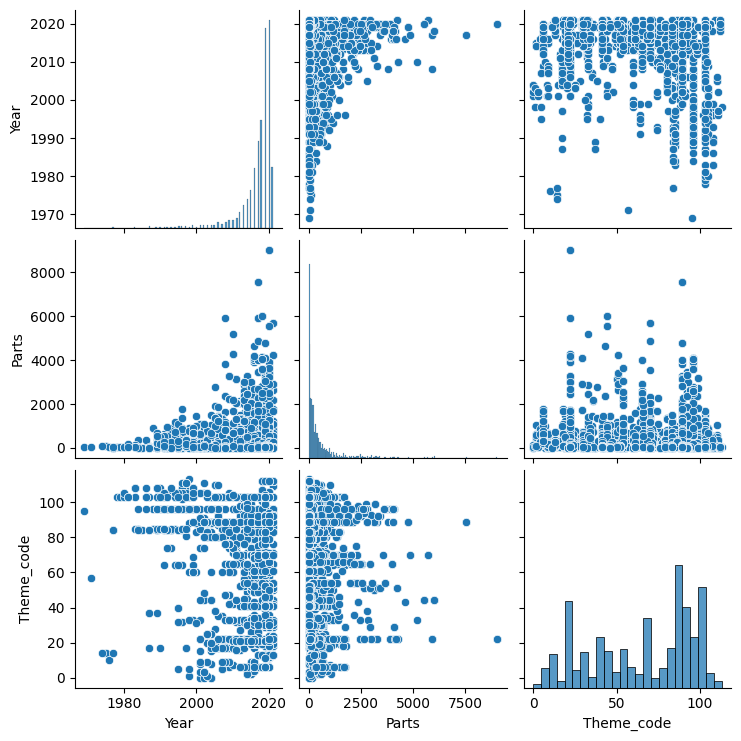

In [46]:
sns.pairplot(lego_base)

# Подготовка данных

In [116]:
lego_base = lego_base.drop_duplicates()

In [117]:
def process_cost(cost: str) -> float | None:
    """ Функция преобразования цены.

    Args:
        cost (str): строка с данными о цене.

    Returns:
        float | None: цена во франках.
    """
    match = re.search(r'(\d[\d,]*)', cost)
    if match:
        value = match.group(1).replace(',', '')
        return float(value)
    return None

In [118]:
lego_base['Cost'] = lego_base['Cost'].apply(process_cost)
lego_base['Cost'] = (lego_base['Cost']*0.0017).round(2)

In [91]:
lego_base.describe()

,Year,Parts,Cost,Theme_code
count,9876.000000,9876.000000,9876.000000,9876.000000
mean,2016.935804,477.565917,90.564837,65.513973
std,5.160486,808.999578,177.748401,30.865321
min,1969.000000,0.000000,0.970000,0.000000
25%,2016.000000,49.000000,14.630000,41.000000
50%,2019.000000,194.000000,36.690000,70.000000
75%,2020.000000,510.000000,96.290000,92.000000
max,2021.000000,9036.000000,5132.920000,113.000000


In [126]:
def cut_df(df: "pd.DataFrame", cols: list) -> "pd.DataFrame":
    """Функиция убирает 10% значений с наибольшими отклонениями и назначает новые минимум и максимум.

    Args:
        df (pd.DataFrame): исходный датафрейм.
        cols (list): список параметров.

    Returns:
        pd.DataFrame: результирующий датафрейм без выбросов.
    """
    desc = df[cols].describe()

    df1 = df[cols].clip(
        lower=df[cols].quantile(0.10), upper=df[cols].quantile(0.9), axis=1
    )
    desc1 = df1[cols].describe()

    for col in cols:
        if desc[col][3] != desc1[col][3]:
            df.loc[df[col] < desc1[col][3], col] = desc1[col][3]

        if desc[col][-1] != desc1[col][-1]:
            df.loc[df[col] > desc1[col][-1], col] = desc1[col][-1]

    del df1
    return df

In [127]:
cut_df(lego_base, ['Cost']).describe()

,Year,Parts,Cost
count,9876.000000,9876.000000,9876.000000
mean,2016.935804,477.565917,67.815972
std,5.160486,808.999578,71.931577
min,1969.000000,0.000000,6.410000
25%,2016.000000,49.000000,14.630000
50%,2019.000000,194.000000,36.690000
75%,2020.000000,510.000000,96.290000
max,2021.000000,9036.000000,229.310000


In [128]:
lego_base = cut_df(lego_base, ['Cost'])

In [52]:
lego_base.head()

,Set,Name,Theme,Year,Parts,Cost,Theme_code
0,77901-1,Sith Trooper Bust,Star Wars,2019,484,11.00,89
1,4002019-1,Yuletide Squadron Xmas-Wing Starfighter,LEGO Exclusive,2019,1038,11.00,53
2,77903-1,The Dark Knight of Gotham City,Super Heroes DC,2019,427,15.76,92
3,4000034-1,The LEGO System House,LEGO Exclusive,2019,998,110.14,53
4,4002017-1,Nutcracker,LEGO Exclusive,2017,729,18.34,53


# Обучение модели

In [131]:
X = lego_base[['Theme_code','Year','Parts']]
y = lego_base[['Cost']]

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [133]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.5217958673507571

In [134]:
model.score(X_test, y_test)

0.5060671461855881

# Оценка метрик

In [135]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [136]:
mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test)

(34.59829484695473, 35.23810005847682)

In [137]:
mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test)

(2449.2785712082773, 2656.1290715428368)

In [138]:
r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)

(0.5217958673507571, 0.5060671461855881)

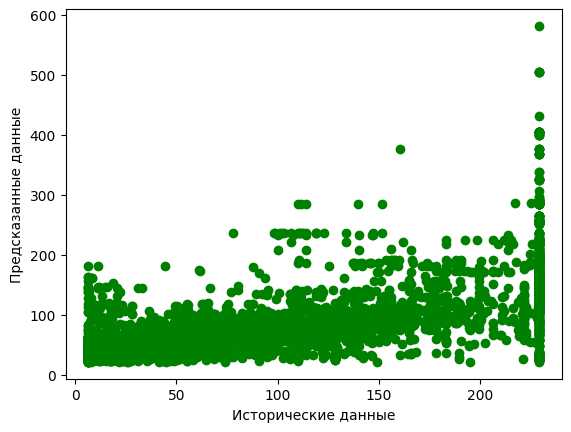

In [140]:
plt.scatter(y_train, y_pred_train, color='green')

plt.xlabel('Исторические данные')
plt.ylabel('Предсказанные данные');